<a href="https://colab.research.google.com/github/LeonSilva15/fcc-machine-learning/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## Get project data

In [4]:
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
!unzip cats_and_dogs.zip

--2023-11-19 07:32:19--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1 100%[===================>]  67.43M   127MB/s    in 0.5s    

2023-11-19 07:32:19 (127 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# See data structure

In [5]:
!apt-get install tree

^C


In [ ]:
!tree cats_and_dogs

## Create the paths

In [6]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

## Get data size

In [7]:
# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

print( 'total_train:', total_train )
print( 'total_val:', total_val )
print( 'total_test:', total_test )

total_train: 2001
total_val: 1001
total_test: 51


## Pre-processing and Training variables

In [8]:
IMG_HEIGHT = 150
IMG_WIDTH = 150

## Imaga generators

In [15]:
train_image_generator = ImageDataGenerator(
      rescale=1. / 255,
      zoom_range = 0.2,
      horizontal_flip = True,
      width_shift_range = 0.2,
      height_shift_range = 0.2
)
validation_image_generator = ImageDataGenerator(
      rescale=1. / 255
)
test_image_generator = ImageDataGenerator(
      rescale=1. / 255
)

train_data_gen = train_image_generator.flow_from_directory(
      train_dir,
      color_mode='rgb',
      batch_size=32,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      shuffle=True,
      class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
      validation_dir,
      color_mode='rgb',
      batch_size=32,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      shuffle=True,
      class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
      PATH,
      color_mode='rgb',
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      classes=['test'],
      shuffle=False,
      class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


## Image plotter

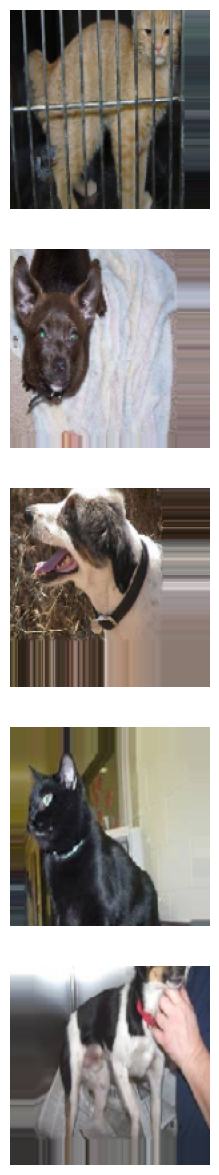

In [16]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

## Create the Model

In [24]:
model = Sequential()

model.add( Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3) ))
model.add( MaxPooling2D((2, 2)) )
model.add( Conv2D(64, (3, 3), activation='relu' ))
model.add( MaxPooling2D((2, 2)) )
model.add( Conv2D(64, (3, 3), activation='relu' ))

model.add( Flatten() )
model.add( Dense(64, activation='relu' ))
model.add( Dense(1, activation='sigmoid' ))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 73984)            

## Compile the model

In [25]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train the model

In [ ]:
step_size_train = train_data_gen.n // train_data_gen.batch_size

history = model.fit(
    train_data_gen,
    steps_per_epoch = step_size_train,
    batch_size = train_data_gen.batch_size,
    validation_data = val_data_gen,
    epochs = 50
)

Epoch 1/50
62/62 [==============================] - 96s 2s/step - loss: 0.7395 - accuracy: 0.5229 - val_loss: 0.6939 - val_accuracy: 0.5020
Epoch 2/50
62/62 [==============================] - 93s 1s/step - loss: 0.6903 - accuracy: 0.5518 - val_loss: 0.7223 - val_accuracy: 0.5230
Epoch 3/50
62/62 [==============================] - 104s 2s/step - loss: 0.6882 - accuracy: 0.5412 - val_loss: 0.6582 - val_accuracy: 0.6270
Epoch 4/50
62/62 [==============================] - 104s 2s/step - loss: 0.6654 - accuracy: 0.5788 - val_loss: 0.6607 - val_accuracy: 0.5860
Epoch 5/50
62/62 [==============================] - ETA: 0s - loss: 0.6655 - accuracy: 0.6011